In [62]:
import yfinance as yf 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import time

import tushare as tscn
import time
import sys

import warnings
warnings.simplefilter("ignore")
import os
#os.chdir(r'E:\SR\REITs')

% matplotlib inline

In [121]:
url_Nyse = 'https://raw.githubusercontent.com/derrickfwang/Stock_Related_Scripts/master/NYSE.csv'
url_Nsdq = 'https://raw.githubusercontent.com/derrickfwang/Stock_Related_Scripts/master/NASDAQ.csv'
url_Amex = 'https://raw.githubusercontent.com/derrickfwang/Stock_Related_Scripts/master/AMEX.csv'
Nyse = pd.read_csv(url_Nyse, index_col=0)
Nsdq = pd.read_csv(url_Nsdq, index_col=0)
Amex = pd.read_csv(url_Amex, index_col=0)

In [155]:
selectedCols = ['Name', 'MarketCap', 'IPOyear', 'Sector', 'industry']
StockList = pd.concat([Nyse[selectedCols], Nsdq[selectedCols], Amex[selectedCols]], axis=0).reset_index()

In [152]:
# define the functions

def getUsStock(US_Stock, start, end):
    sp500 = yf.download('^GSPC', start, end)
    sp500.reset_index(inplace=True, drop=False)
    sp500 = sp500.rename(columns = {'Adj Close':'Sp500'})
    
    UsStock = yf.download(US_Stock, start, end)
    UsStock.reset_index(inplace=True, drop=False)
    UsStock = UsStock.rename(columns = {'Adj Close':US_Stock})
    
    US = pd.merge(sp500[['Date','Sp500']], UsStock[['Date',US_Stock]], on = 'Date', how = 'left')
    
    return US

def drawUsStocks(Merged, ticker):
    StockInfo = StockList[StockList['Symbol'] == ticker]
    StockInfo = StockInfo.reset_index(drop=True)
    print(StockInfo['Name'][0],'\t', StockInfo['industry'][0])
    
    fig, ax1 = plt.subplots(figsize = (16,6))
    fig.suptitle(ticker, fontsize=16, y = 0.92)
    
    ax1.plot(Merged['Date'], Merged['Sp500'])
    ax1.set_ylabel('SP500', fontsize = 12)
    plt.legend(loc = 'upper left')
    plt.grid()
    
    ax2 = ax1.twinx()
    
    #ax2.bar(Rst['Date'], Rst['IncreaseIndicator'], color = 'green', alpha = 0.5, width = 2)
    ax2.plot(Merged['Date'], Merged[ticker], color = 'grey', linestyle='dashed')

    #ax2.set_ylim([0, Rst['Volume'].max() *2])
    ax2.set_ylabel( ticker, fontsize = 12)
    plt.legend()


def getCnStock(CN_Stock, start, end):
    
    hs = tscn.get_hist_data('sh', start=start, end = end)
    hs = hs.sort_index()
    hs.reset_index(inplace=True, drop=False)
    hs['date'] = pd.to_datetime(hs['date'])
    hs = hs.rename(columns = {'close':'Sh50', 'date':'Date'})

    CnStock = tscn.get_hist_data(CN_Stock, start=start, end = end)
    CnStock = CnStock.sort_index()
    CnStock.reset_index(inplace=True, drop=False)
    CnStock['date'] = pd.to_datetime(CnStock['date'])
    CnStock = CnStock.rename(columns = {'close':CN_Stock, 'date':'Date'})
   
    CN = pd.merge(hs[['Date','Sh50']], CnStock[['Date',CN_Stock]], on = 'Date', how = 'left')
    
    return CN

def drawUsCnStocks(Merged, ticker):
    StockInfo = StockList[StockList['Symbol'] == ticker]
    StockInfo = StockInfo.reset_index(drop=True)
    print(StockInfo['Name'][0],'\t', StockInfo['industry'][0])
    
    fig, ax1 = plt.subplots(figsize = (16,6))
    fig.suptitle(ticker, fontsize=16, y = 0.92)
    
    ax1.plot(Merged['Date'], Merged['Sp500'])
    ax1.plot(Merged['Date'], Merged['SSEC'])
    ax1.set_ylabel('SP500 & SSEC', fontsize = 12)
    plt.legend(loc = 'upper left')
    
    ax2 = ax1.twinx()
    
    #ax2.bar(Rst['Date'], Rst['IncreaseIndicator'], color = 'green', alpha = 0.5, width = 2)
    ax2.plot(Merged['Date'], Merged[ticker], color = 'grey', linestyle='dashed')

    #ax2.set_ylim([0, Rst['Volume'].max() *2])
    ax2.set_ylabel( ticker, fontsize = 12)
    plt.legend()
    
def getUsCnStock(US_Stock, start, end):
    
    sp500 = yf.download('^GSPC', start, end)
    sp500.reset_index(inplace=True, drop=False)
    sp500 = sp500.rename(columns = {'Adj Close':'Sp500'})
    
    UsStock = yf.download(US_Stock, start, end)
    UsStock.reset_index(inplace=True, drop=False)
    UsStock = UsStock.rename(columns = {'Adj Close':US_Stock})
    
    US = pd.merge(sp500[['Date','Sp500']], UsStock[['Date',US_Stock]], on = 'Date', how = 'left')
    
    hs = tscn.get_hist_data('sh', start=start, end = end)
    hs = hs.sort_index()
    hs.reset_index(inplace=True, drop=False)
    hs['date'] = pd.to_datetime(hs['date'])
    hs = hs.rename(columns = {'close':'SSEC', 'date':'Date'})
    
    fnlDf = pd.merge(US[['Date',US_Stock,'Sp500']], hs[['Date', 'SSEC']], on = 'Date'
                    , how = 'outer')
    
    fnlDf = fnlDf.sort_values(by='Date')

    return fnlDf

def drawUsCnStocksRelative(Merged, ticker):
    StockInfo = StockList[StockList['Symbol'] == ticker]
    StockInfo = StockInfo.reset_index(drop=True)
    print(StockInfo['Name'][0],'\t', StockInfo['industry'][0])
    
    Merged[['Sp500','SSEC',ticker]] = Merged[['Sp500','SSEC',ticker]].divide(Merged[['Sp500','SSEC',ticker]].ix[0])
    
    fig, ax1 = plt.subplots(figsize = (16,6))
    fig.suptitle(ticker, fontsize=16, y = 0.92)
    
    ax1.plot(Merged['Date'], Merged['Sp500'])
    ax1.plot(Merged['Date'], Merged['SSEC'])
    ax1.set_ylabel('SP500 & SSEC', fontsize = 12)
    ax1.plot(Merged['Date'], Merged[ticker], color = 'grey', linestyle='dashed')
    plt.legend()
    plt.grid()

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
General Electric Company 	 Consumer Electronics/Appliances


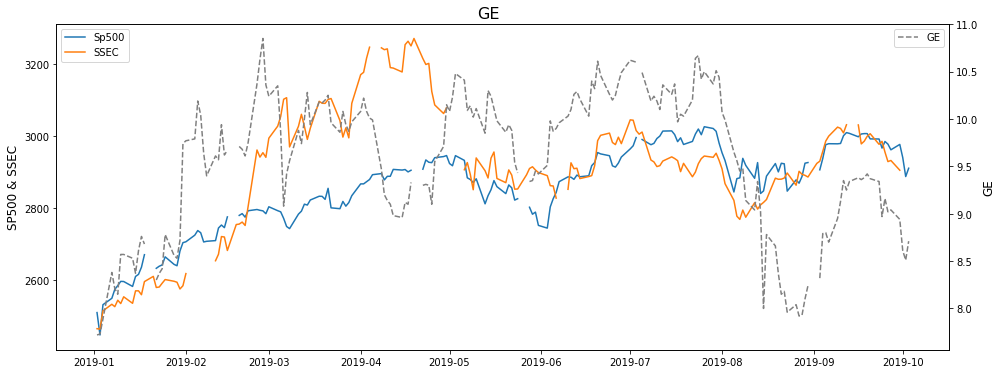

In [153]:
US_Stock = 'GE'
start = '2019-01-01'
end = '2019-10-04'
df = getUsCnStock(US_Stock, start, end)
drawUsCnStocks(df, US_Stock)

General Electric Company 	 Consumer Electronics/Appliances


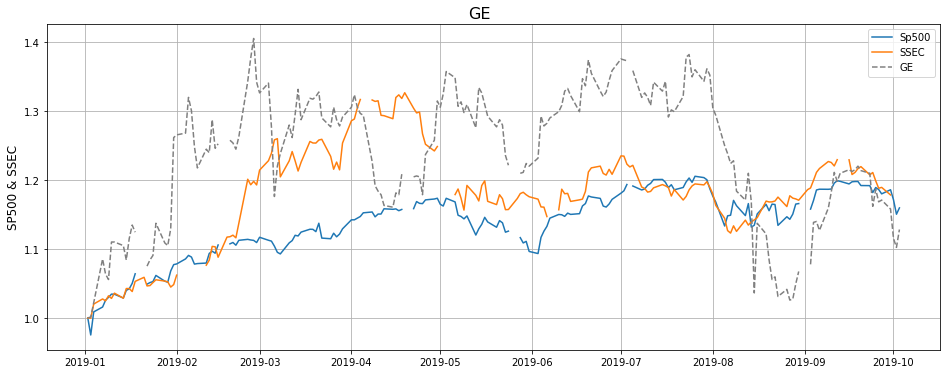

In [154]:
drawUsCnStocksRelative(df, US_Stock)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


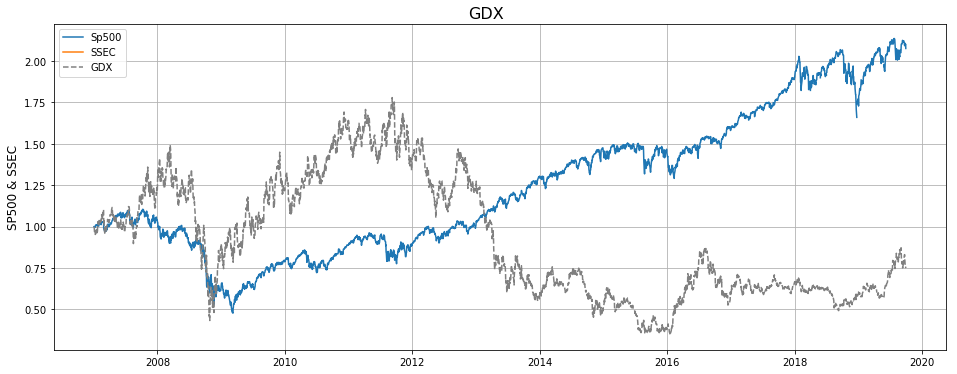

In [103]:
US_Stock = 'GDX'
start = '2007-01-01'
end = '2019-10-01'
df = getUsCnStock(US_Stock, start, end)
drawUsCnStocksRelative(df, US_Stock)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


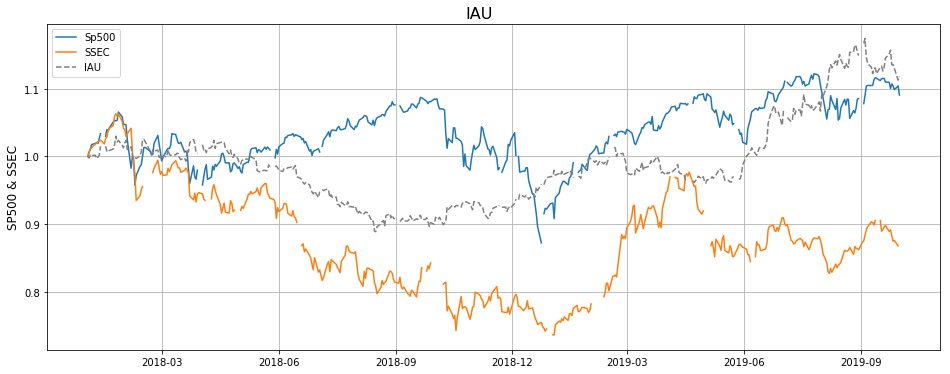

In [104]:
US_Stock = 'IAU'
start = '2018-01-01'
end = '2019-10-01'
df = getUsCnStock(US_Stock, start, end)
drawUsCnStocksRelative(df, US_Stock)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


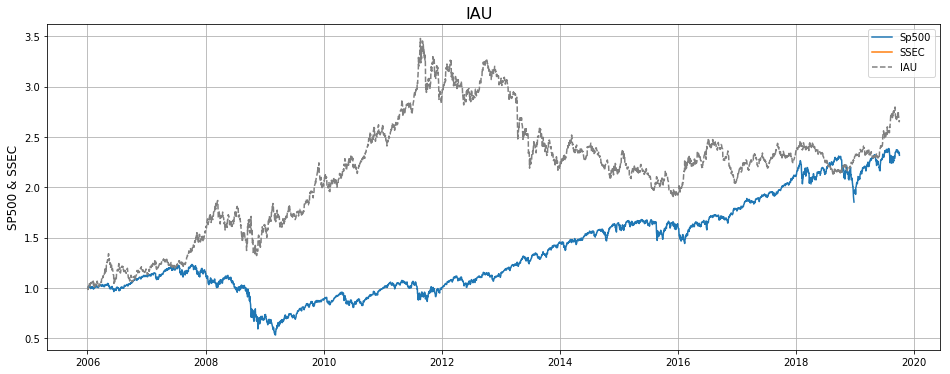

In [110]:
US_Stock = 'IAU'
start = '2006-01-01'
end = '2019-10-01'
df = getUsCnStock(US_Stock, start, end)
drawUsCnStocksRelative(df, US_Stock)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


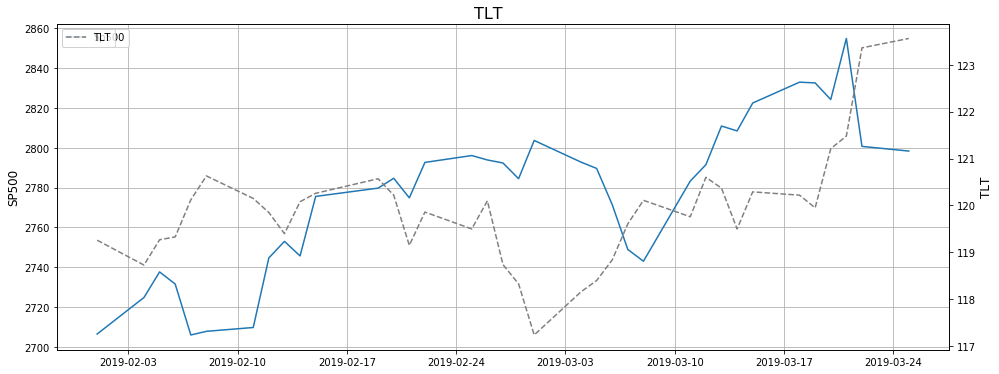

In [46]:
US_Stock = 'TLT'

start = '2019-2-01'
end = '2019-03-25'

US = getUsStock(US_Stock, start, end)

ticker = US_Stock
drawUsStocks(US, ticker)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


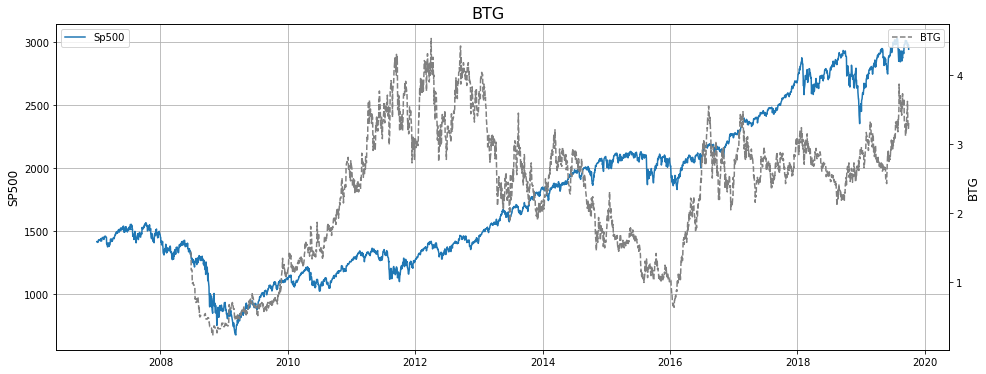

In [99]:
US_Stock = 'BTG'

start = '2007-01-01'
end = '2019-10-01'

US = getUsStock(US_Stock, start, end)

ticker = US_Stock
drawUsStocks(US, ticker)

# Detailed Analysis Using AlphaVantage minute data

In [115]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from stockstats import StockDataFrame as Sdf
import time
import pandas as pd
from datetime import datetime

ts = TimeSeries(key='YDTG632CVJ4469F6', output_format='pandas')

def getDaily(Name, size):
    daily, meta_data = ts.get_daily_adjusted(symbol=Name,outputsize=size)
    
    daily = daily[daily['1. open'].notnull()]

    daily['open'] = daily['1. open'] *  daily['5. adjusted close'] /daily['4. close'] 
    daily['high'] = daily['2. high'] *  daily['5. adjusted close'] /daily['4. close']
    daily['low'] = daily['3. low'] *  daily['5. adjusted close'] /daily['4. close'] 
    daily['close'] = daily['5. adjusted close']

    
    
    daily['volume'] = daily['6. volume']

    daily = Sdf.retype(daily)
    daily['kdjd']=daily['kdjd']
    daily['kdjd_5']=daily['kdjd_5']
    daily['boll'] =daily['boll']
    daily['close_55_sma'] = daily['close_55_sma']
    daily = daily[daily['open'] > 0]
    
    daily = daily[['open', 'high', 'low', 'close','volume', 'kdjj', 'kdjd','kdjd','kdjk',
                   'close_20_sma','boll_ub', 'boll_lb','close_55_sma']]
    return daily
def minutes(Name, interval, size):
    data, meta_data = ts.get_intraday(symbol=Name,interval=interval, outputsize=size)

    columDict = {'1. open':'open', '5. volume':'volume', '2. high':'high', '4. close':'close', '3. low':'low'}
    data = data.rename(columns=columDict)
    data = data[['open', 'high', 'low', 'close','volume']]

    ssdf = Sdf.retype(data)
    data['kdjd']=ssdf['kdjd']
    data['kdjd_5']=ssdf['kdjd_5'] 
    data['boll'] =ssdf['boll']
    data['close_55_sma'] = ssdf['close_55_sma']
    data = data[['open', 'high', 'low', 'close','volume', 'kdjj', 'kdjd','kdjd','kdjk',
                 'close_20_sma','boll_ub', 'boll_lb','close_55_sma']]
    return data

def plot(data):
    plt.figure(figsize=(12.5,4),facecolor='white')
    ax1 = data['kdjj'].plot(alpha=1, color='c', rot=15)
    ax1 = data['kdjk'].plot(alpha=1, color='r', rot=15)
    ax2 = data['close'].plot(secondary_y=True,color='black')
    ax2 = data['close_20_sma'].plot(secondary_y=True,color='b',alpha=0.6)
    ax2 = data['close_55_sma'].plot(secondary_y=True,color='m',alpha=0.6)
    ax2 = data['boll_ub'].plot(secondary_y=True,color='black', alpha=0.3)
    ax2 = data['boll_lb'].plot(secondary_y=True,color='black', alpha=0.3)
    
    #ax2 = data['kdjd'].plot(secondary_y=True, alpha=1, color='g', rot=15)
    #ax2.set_ylim(1, 100)
    #ax1.xticks(rotation=45)
    plt.show()

    
def plot1(daily):
    daily['date']=pd.to_datetime(daily.index)
    ma = daily.close.rolling(20).mean()
    mstd = daily.close.rolling(20).std()
    ma50 = daily.close.rolling(50).mean()
    
    fig, ax1 = plt.subplots(figsize=(12.5, 4))
    ax2 = ax1.twinx()
    ax2.plot(daily.date, daily.close, 'k')
    ax2.plot(daily.date, ma, 'b', alpha=0.6)
    ax2.plot(daily.date, ma50, 'm', alpha=0.6)
    ax2.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)

    ax1.plot(daily.date, daily.kdjk, 'g')
    ax1.plot(daily.date, daily.kdjd, 'r')
    ax1.plot(daily.date, daily.kdjj, 'c')
    #ax2.set_ylim(0, 100)
    plt.show()

def plot2(daily):
    daily['date']=pd.to_datetime(daily.index)
    ma = daily.close.rolling(20).mean()
    mstd = daily.close.rolling(20).std()
    ma50 = daily.close.rolling(50).mean()
    
    fig, ax1 = plt.subplots(figsize=(10, 3))
    ax2 = ax1.twinx()
    ax2.plot(daily.date, daily.close, 'k')
    ax2.plot(daily.date, ma, 'y', alpha=0.5)
    ax2.plot(daily.date, ma50, 'b', alpha=0.5)
    ax2.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)

    ax2.set_yscale('log')
    ax1.plot(daily.date, daily.kdjk, 'g')
    ax1.plot(daily.date, daily.kdjd, 'r')
    ax1.plot(daily.date, daily.kdjj, 'c')
    #ax1.set_yscale('log')
    #ax2.set_ylim(0, 100)
    plt.show()
    
    
def stockVolatility(name):
    df1 = getDaily(name,'compact')
    df2 = df1[df1['open'] > 0]
    #df2['closePct'] = 100*(df2['open'] - df2['close']) / df2['open']
    #df2['rangePct'] = 100* (df2['high'] - df2['low']) / df2['open']
    df2['highPct'] = 100* (df2['high'] - df2['close']) / df2['close']
    df2['lowPct'] = 100* (df2['low'] - df2['close']) / df2['close']
    
    dT = df2[['highPct','lowPct']].describe()
    l = (100+ dT['lowpct']['75%'])*df2['close'][-1] / 100
    h = (100 + dT['highpct']['25%'])*df2['close'][-1] / 100 
    
    print("{0}, newest daily date: {1}".format(name, df2.index[-1]))
    print(" Daily variation: 75% between {0:.2f} and {1:.2f}".format(l, h))
    print(" 75% Theoretical gain: {0:.2f} %".format(dT['highpct']['25%'] - dT['lowpct']['75%']))    
    print("\n")
       
    
    
def getStockTrend(Name):
    start = time.time()
    print(Name)
    print(datetime.now().strftime("%Y-%m-%d %H:%M"))
    print("\n")
    
    try:
        stockVolatility(Name)
    except:
        print("can't get stats")

    try:
        daily = getDaily(Name, 'compact')
        print ("time used {0} seconds.".format(int(time.time() - start)))
        print('Daily')
        plot1(daily)
        
    except:
        print("can't get daily data")
        daily=pd.DataFrame()
        pass


    try:
        start = time.time()
        OneMin = minutes(Name, '1min', 'compact')
        print ("time used {0} seconds.".format(int(time.time() - start)))
        print('One Minute')
        
        df2 = OneMin
        df2['highPct'] = 100* (df2['high'] - df2['close']) / df2['close']
        df2['lowPct'] = 100* (df2['low'] - df2['close']) / df2['close']
    
        dT = df2[['highPct','lowPct']].describe()
        l = (100+ dT['lowPct']['75%'])*df2['close'][-1] / 100
        h = (100 + dT['highPct']['25%'])*df2['close'][-1] / 100 
    
        print("{0}, newest one minute date time: {1}".format(Name, df2.index[-1]))
        print(" 1 minutes variation: 75% between {0:.2f} and {1:.2f}".format(l, h))
        print(" 1 min 75% Theoretical gain: {0:.2f} %".format(dT['highPct']['25%'] - dT['lowPct']['75%']))    
        print("\n") 
        
        
        plot(OneMin)
    except:
        print("can't get one minute data")
        pass


    try:
        start = time.time()
        FiveMin = minutes(Name, '5min', 'compact')
        print ("time used {0} seconds.".format(int(time.time() - start)))
        print('FiveMin')
        
        df2 = FiveMin
        df2['highPct'] = 100* (df2['high'] - df2['open']) / df2['open']
        df2['lowPct'] = 100* (df2['low'] - df2['open']) / df2['open']
    
        dT = df2[['highPct','lowPct']].describe()
        l = (100+ dT['lowPct']['75%'])*df2['open'][-1] / 100
        h = (100 + dT['highPct']['25%'])*df2['open'][-1] / 100 
    
        print("{0}, newest five minute date time: {1}".format(Name, df2.index[-1]))
        print(" 5 minutes variation: 75% between {0:.2f} and {1:.2f}".format(l, h))
        print(" 5 min 75% Theoretical gain: {0:.2f} %".format(dT['highPct']['25%'] - dT['lowPct']['75%']))    
        print("\n")         
               
        plot(FiveMin)
    except:
        print("can't get five minute data")
        pass

    try:
        start = time.time()
        FifteenMin = minutes(Name, '15min', 'compact')
        print ("time used {0} seconds.".format(int(time.time() - start)))
        print('FifteenMin')
        plot(FifteenMin)
    except:
        print("can't get fifteen minute data")
        pass

IAU
2019-10-01 23:35


IAU, newest daily date: 2019-10-01
 Daily variation: 75% between 14.14 and 14.19
 75% Theoretical gain: 0.37 %


time used 1 seconds.
Daily


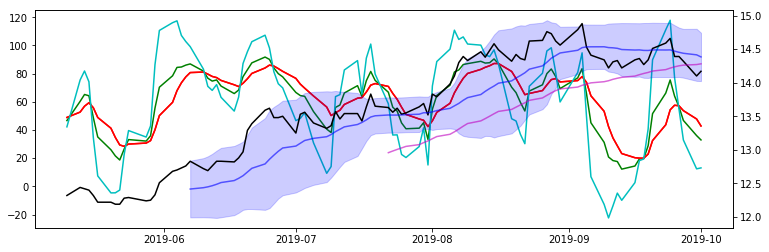

time used 1 seconds.
One Minute
IAU, newest one minute date time: 2019-10-01 16:00:00
 1 minutes variation: 75% between 14.17 and 14.17
 1 min 75% Theoretical gain: 0.00 %




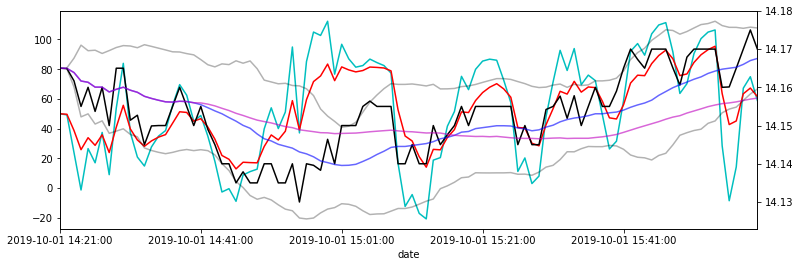

time used 1 seconds.
FiveMin
IAU, newest five minute date time: 2019-10-01 16:00:00
 5 minutes variation: 75% between 14.17 and 14.17
 5 min 75% Theoretical gain: 0.02 %




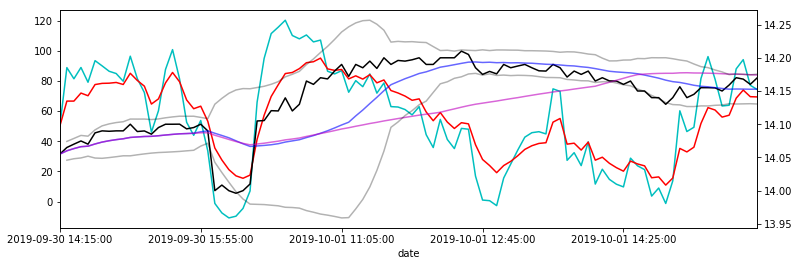

time used 1 seconds.
FifteenMin


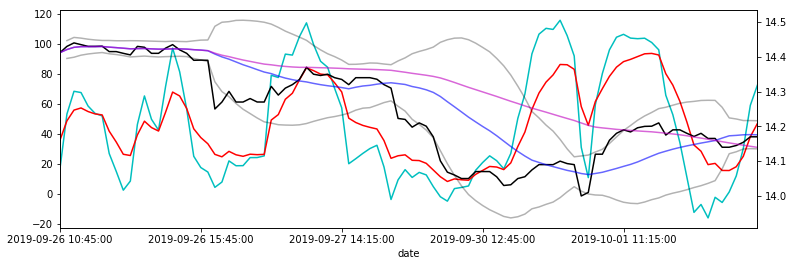

In [116]:
getStockTrend('IAU')